# Plots for the base model and external stress

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from multiprocessing import Pool

from love import base_model as base 
from love import external_stress as stress

## Base model for two people without external stress

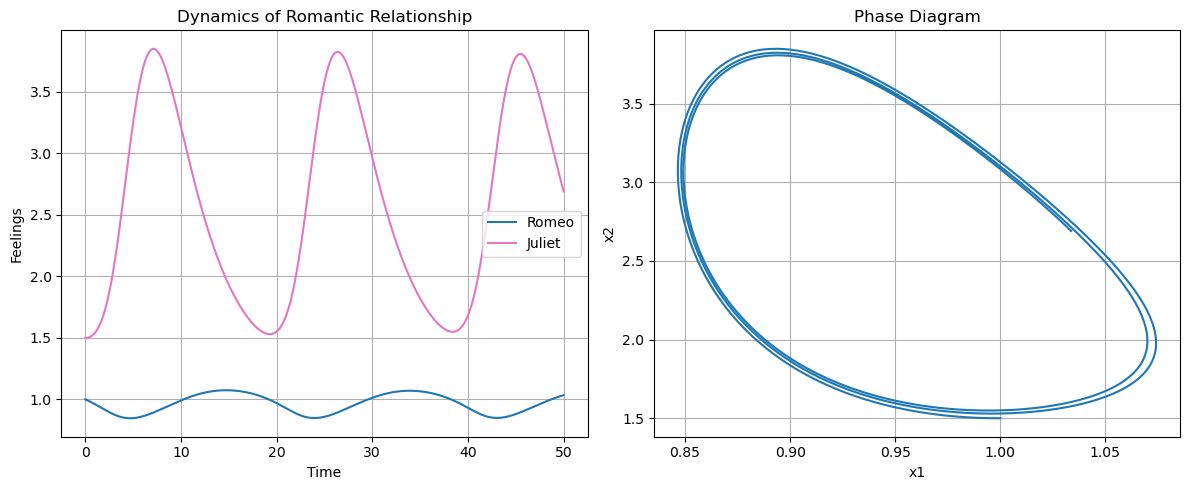

In [6]:
# Parameters w/ extensive comments
params = [
    0.36,   # alpha1    =   Forgetting coefficient 1 (decay rate of love of individual 1 in absence of partner)
    0.2,    # alpha2    =   Forgetting coefficient 2
    0.75,   # beta1     =   Reactiveness to love of 2 on 1 (influence of the partner's love on an individual's feelings)
    10.66,  # beta2     =   Reactiveness to love of 1 on 2
    1,      # gamma1    =   Reactiveness to appeal of 2 on 1 (influence of the partner's appeal on an individual's feelings)
    1,      # gamma2    =   Reactiveness to appeal of 1 on 2
    2.9,    # bA1       =   Bias coefficient of individual 1 (how much individual 1 is biased towards their partner, > 0 for synergic, 0 for unbiased, < 0 for platonic)
    1,      # bA2       =   Bias coefficient of individual 2
    0.1,    # A1        =   Appeal of individual 1 (how much individual 1 is appealing to their partner)
    0.1,    # A2        =   Appeal of individual 2
    0.08,   # k1        =   Insecurity of individual 1 (Peak of reaction function of 1 on 2, high k1 means they are annoyed by their partner's love earlier)
    1.5,    # k2        =   Insecurity of individual 2
    1,      # n1        =   Shape of reaction function of 1 on 2 (nonlinearity of reaction function of 1 on 2, sensitivity of the individuals' feelings to changes in their partner's feelings)
    4,      # n2        =   Shape of reaction function of 2 on 1
    4,      # m1        =   Shape of bias function of 1 (nonlinearity of bias function of 1, sensitivity of how the own feelings influence their perception of their partner's appeal)
    4,      # m2        =   Shape of bias function of 2
    1,      # sigma1    =   Saddle quantity of 1 (Trace of Jabobian of 1, threshold of when own feelings influence their perception of their partner's appeal. > 0 for stable, < 0 for unstable)
    1       # sigma2    =   Saddle quantity of 2
]


# Initial conditions
initial_conditions = [1, 1.5]
t = np.linspace(0, 50, 1000)

solution = base.odeint(base.love_dynamics, initial_conditions, t, args=(params,))


# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Time series
axs[0].plot(t, solution[:, 0], label='Romeo', color='tab:blue')
axs[0].plot(t, solution[:, 1], label='Juliet', color='tab:pink')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Feelings')
axs[0].set_title('Dynamics of Romantic Relationship')
axs[0].legend()
axs[0].grid(True)

# Phase diagram
axs[1].plot(solution[:, 0], solution[:, 1])
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].set_title('Phase Diagram')
axs[1].grid(True)

fig.tight_layout()

plt.show()

## External stress

### Initial parameters

In [7]:
# Parameters
params = [
    0.36,   # alpha1    =   Forgetting coefficient 1 (decay rate of love of Romeo in absence of partner)
    0.2,    # alpha2    =   Forgetting coefficient 2
    0.75,   # beta1     =   Reactiveness to love of 2 on 1 (influence of the partner's love on an individual's feelings)
    10.66,  # beta2     =   Reactiveness to love of 1 on 2
    1,      # gamma1    =   Reactiveness to appeal of 2 on 1 (influence of the partner's appeal on an individual's feelings)
    1,      # gamma2    =   Reactiveness to appeal of 1 on 2
    2.9,    # bA1       =   Bias coefficient of Romeo (how much Romeo is biased towards their partner, > 0 for synergic, 0 for unbiased, < 0 for platonic)
    1,      # bA2       =   Bias coefficient of individual 2
    0.15,  # A1        =   Appeal of Romeo (how much Romeo is appealing to their partner)
    0.1,    # A2        =   Appeal of individual 2
    0.08,   # k1        =   Insecurity of Romeo (Peak of reaction function of 1 on 2, high k1 means they are annoyed by their partner's love earlier)
    1.5,    # k2        =   Insecurity of individual 2
    1,      # n1        =   Shape of reaction function of 1 on 2 (nonlinearity of reaction function of 1 on 2, sensitivity of the individuals' feelings to changes in their partner's feelings)
    4,      # n2        =   Shape of reaction function of 2 on 1
    4,      # m1        =   Shape of bias function of 1 (nonlinearity of bias function of 1, sensitivity of how the own feelings influence their perception of their partner's appeal)
    4,      # m2        =   Shape of bias function of 2
    1,      # sigma1    =   Saddle quantity of 1 (Trace of Jabobian of 1, threshold of when own feelings influence their perception of their partner's appeal. > 0 for stable, < 0 for unstable)
    1       # sigma2    =   Saddle quantity of 2
]

t = np.linspace(0, 208, 1000000)
A1_values = np.linspace(0.05, 0.19, 25)
epsilon_values = np.linspace(0, 1, 25)
epsilon = 0.26
initial_conditions = [0.895, 1.5]
omega = 2 * np.pi / 52

param_combinations = [(A1, epsilon) for A1 in A1_values for epsilon in epsilon_values]

start_time = time.time()

with Pool() as pool:
    results = pool.map(stress.compute_LLE_for_params, param_combinations)

LLE_values = np.array(results).reshape(len(A1_values), len(epsilon_values))

end_time = time.time()
print(f"Total runtime: {end_time - start_time:.2f} seconds")


Total runtime: 2.85 seconds


### The dynamics under external stress

Increase the time for more points on the peak-to-peak plot.

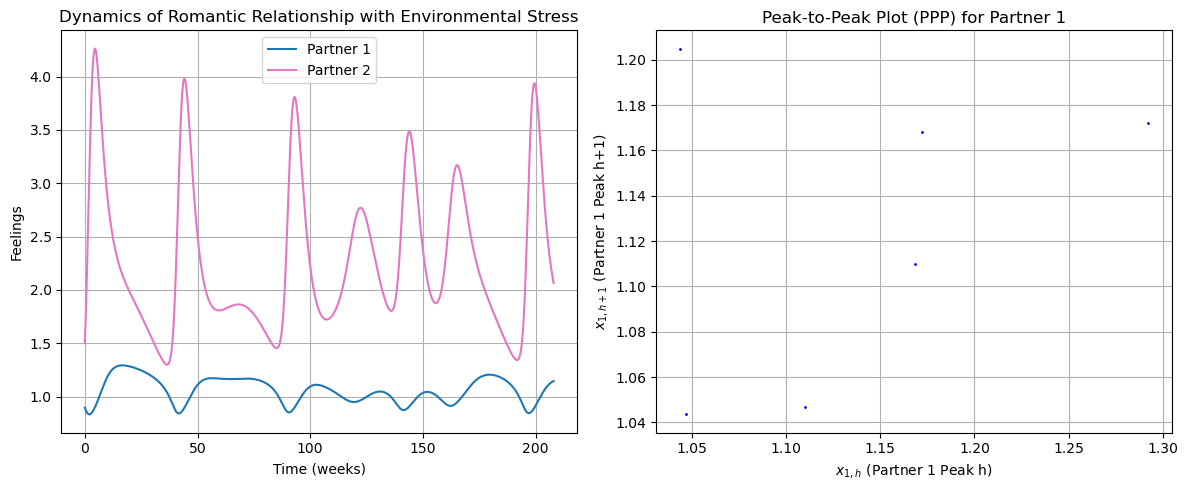

In [8]:
stress.plot_dynamics(t, solution, epsilon, omega, params, initial_conditions)

### The heatmap of the Largest Lyapunov Exponent

Adapt the A1_values and epsilon_values resolution for more detail.

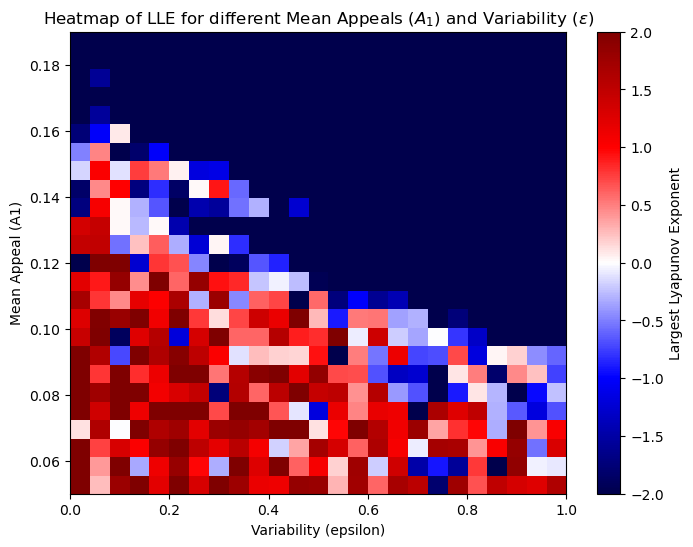

In [9]:
stress.plot_LLE_values(LLE_values, A1_values, epsilon_values)